<a href="https://colab.research.google.com/github/ayrna/ap2122/blob/main/series_temporales/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Profundo

## Práctica 1: Series Temporales

A continuación se va a realizar el ejercicio de Series Temporales propuesto en clase.

In [4]:
%matplotlib inline

import numpy as np

# Numpy was giving some errors and this block of code will solve it:
def dummy_npwarn_decorator_factory():
    def npwarn_decorator(x):
        return x
    return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis de series temporales

Se utilizarán la serie de datos proporcionados en la asignatura sobre producción industrial de los servicios públicos de electricidad y gas en Estados Unidos, de los años 1939 a 2019, con frecuencia de muestreo mensual.

## Leer los datos

In [12]:
df = pd.read_csv("data/produccion-energia.csv")

print(df.head(), "\n")

# Rename columns - DATE,IPG2211A2N
df.columns = ['date', 'ipg']

# Describe
print(df.describe(), "\n")

print(df.info())

         DATE  IPG2211A2N
0  1939-01-01      3.3842
1  1939-02-01      3.4100
2  1939-03-01      3.4875
3  1939-04-01      3.5133
4  1939-05-01      3.5133 

              ipg
count  966.000000
mean    54.490727
std     35.381862
min      3.384200
25%     19.232950
50%     54.702650
75%     87.622375
max    128.907100 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    966 non-null    object 
 1   ipg     966 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.2+ KB
None


## Recodificar los datos

Ahora, vamos a convertir la columna 'date' en un `DateTime` y hacer que sea el índice del `DataFrame`.

Hacemos esto porque al ver el resultado del método `.info()` nos damos cuenta que la columna `date` es de tipo `object`. Este tipo genérico encapsula todo desde cadenas a enteros y esto no es lo que queremos cuando examinamos series temporales. Utilizaremos el método `.to_datetime()` para convertir la columna `date` del `DataFrame` a tipo `DateTime`.

In [13]:
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

print(df.head(), "\n")

print(df.info())

               ipg
date              
1939-01-01  3.3842
1939-02-01  3.4100
1939-03-01  3.4875
1939-04-01  3.5133
1939-05-01  3.5133 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 966 entries, 1939-01-01 to 2019-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ipg     966 non-null    float64
dtypes: float64(1)
memory usage: 15.1 KB
None


# Análisis gráfico de los datos y algunos estadísticos

Utilizando la herramienta de visualización de `pandas` `.plot()` se representan los datos como una línea.

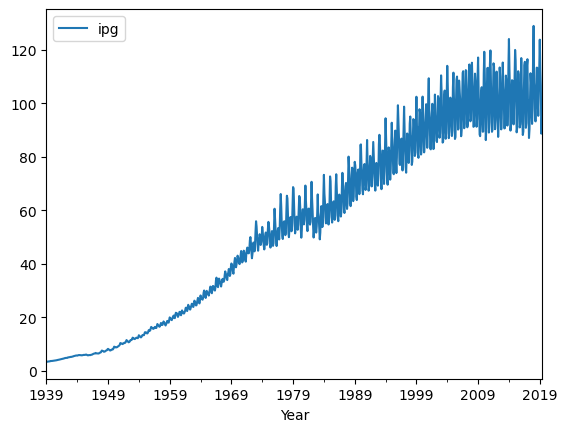

In [15]:
df.plot()
plt.xlabel('Year');

<class 'pandas.core.resample.DatetimeIndexResampler'>
date
1939-12-31    3.582217
1940-12-31    3.950358
1941-12-31    4.456242
1942-12-31    5.005225
1943-12-31    5.530525
Freq: A-DEC, Name: ipg, dtype: float64
date
1939-01-01         NaN
1939-02-01         NaN
1939-03-01         NaN
1939-04-01         NaN
1939-05-01         NaN
1939-06-01         NaN
1939-07-01         NaN
1939-08-01         NaN
1939-09-01         NaN
1939-10-01         NaN
1939-11-01         NaN
1939-12-01    3.582217
1940-01-01    3.614508
1940-02-01    3.648950
1940-03-01    3.679092
1940-04-01    3.707083
1940-05-01    3.737225
1940-06-01    3.767367
1940-07-01    3.797508
1940-08-01    3.827642
Name: ipg, dtype: float64


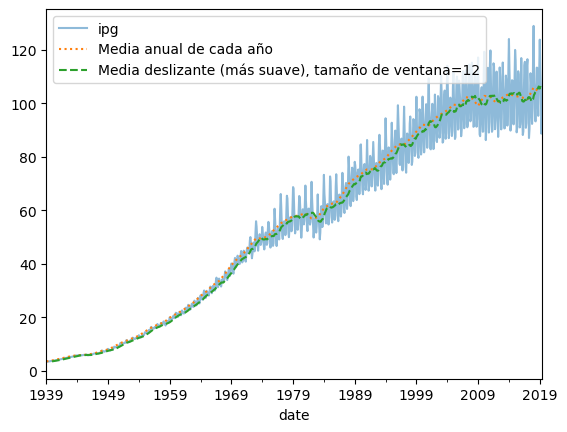

In [18]:
ipg = df['ipg']

print(type(ipg.resample('A')))

diet_resamp_yr = ipg.resample('A').mean()
print(diet_resamp_yr.head())
diet_roll_yr = ipg.rolling(12).mean()
print(diet_roll_yr.head(20))

ax = ipg.plot(alpha=0.5, style='-') # Guardamos los ejes (ax) para reutilizarlos en el resto de plots
diet_resamp_yr.plot(style=':', label='Media anual de cada año', ax=ax)
diet_roll_yr.plot(style='--', label='Media deslizante (más suave), tamaño de ventana=12', ax=ax)
ax.legend();

Podemos hacer la misma operación con `numpy`:

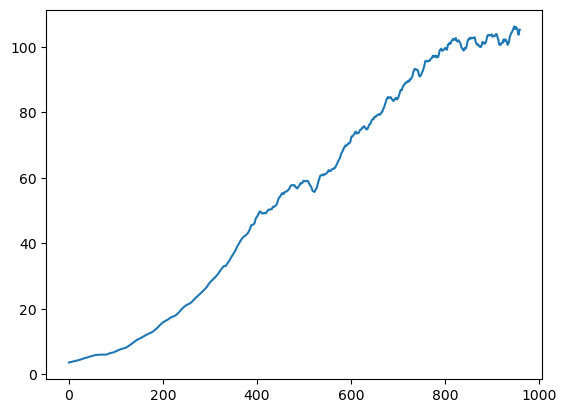

In [20]:
x = np.asarray(df[['ipg']])
win = 12
win_half = int(win / 2)
#print([((idx-win_half), (idx+win_half)) for idx in np.arange(win_half, len(x))])

ipg_smooth = np.array([x[(idx-win_half):(idx+win_half)].mean() for idx in np.arange(win_half, len(x))])
# Ojo, no estamos saliendo de rango, pero es ignorado por numpy
plt.plot(ipg_smooth);

Hacemos un nuevo `DataFrame` que incluya los valores para `ipg` ya suavizados.

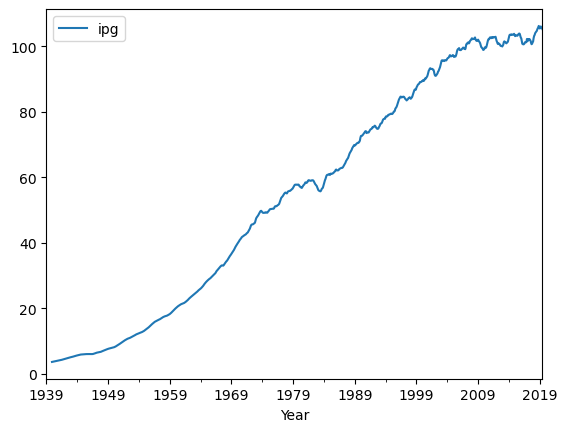

In [21]:
df_avg = pd.concat([ipg.rolling(12).mean()], axis=1)
df_avg.plot()
plt.xlabel('Year');

Eliminar la tendencia de la serie original.

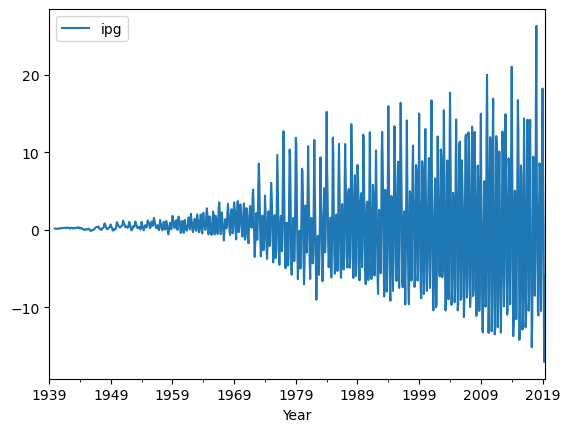

In [22]:
df_dtrend = df[["ipg"]] - df_avg
df_dtrend.plot()
plt.xlabel('Year');

## Diferenciación de primer orden: patrones estacionales

La diferenciación de primer orden nos permite eliminar la tendencia y ver solo los patrones estacionales.

date
1939-01-01    3.3842
1939-02-01    3.4100
1939-03-01    3.4875
1939-04-01    3.5133
1939-05-01    3.5133
Name: ipg, dtype: float64
date
1939-01-01       NaN
1939-02-01    3.3842
1939-03-01    3.4100
1939-04-01    3.4875
1939-05-01    3.5133
Name: ipg, dtype: float64
date
1939-01-01       NaN
1939-02-01    0.0258
1939-03-01    0.0775
1939-04-01    0.0258
1939-05-01    0.0000
Name: ipg, dtype: float64


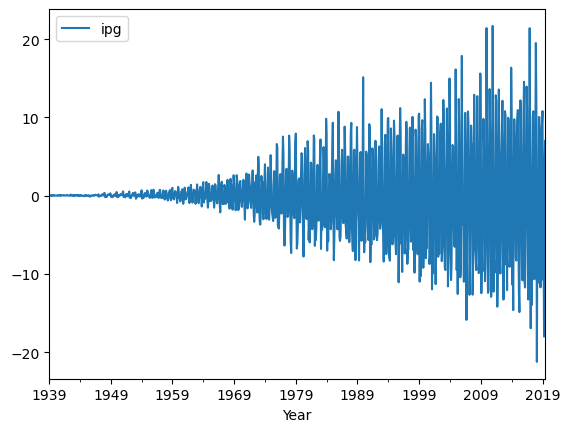

In [23]:
# diff = original - shiftted data
print(ipg.head())
print(ipg.shift().head()) # Serie con retardo de 1 (X_{t-1})
print(ipg.diff().head()) # Serie de diferencias de 1 (X_t-X_{t-1})
assert np.all((ipg.diff() == ipg - ipg.shift())[1:])

df.diff().plot()
plt.xlabel('Year');

## Periodicidad y correlación

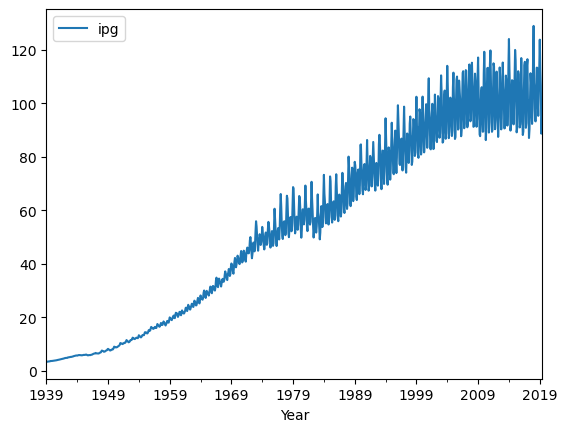

In [24]:
df.plot()
plt.xlabel('Year');

Obtener la matriz de correlaciones

In [25]:
print(df.corr())

     ipg
ipg  1.0


`ipg` tiene una correlación de 1 lo que confirma que sea estacional.

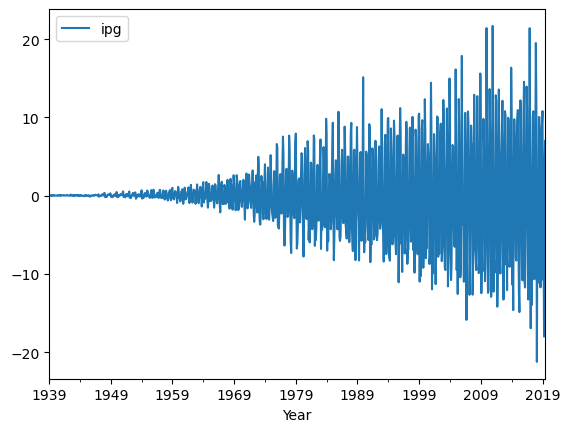

In [26]:
df.diff().plot()
plt.xlabel('Year');

La matriz de correlación es ahora

In [27]:
print(df.diff().corr())

     ipg
ipg  1.0


No ha cambiado, esto es porque sólo tenemos una característica y no se correlaciona ni diferencia con ninguna otra.

# Descomposición de la serie en componentes de tendencia, estacional y residual

Para verlo todo mucho más claro, podemos usar el método `seasonal_decompose` que descompone la serie en sus componentes estacional, de tendencia y residual.

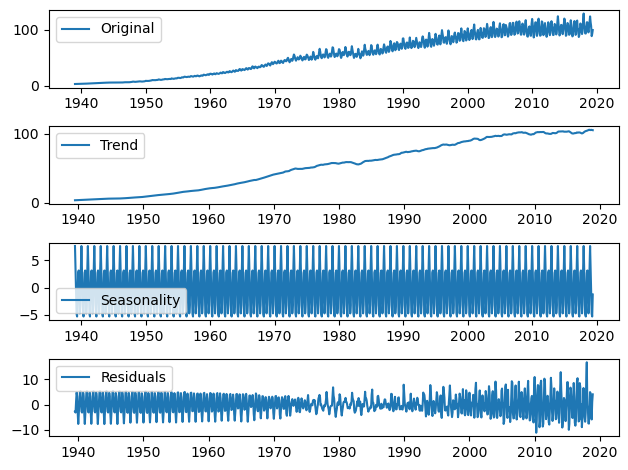

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

x = ipg

x = x.astype(float) # force float
decomposition = seasonal_decompose(x)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(x, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Podemos hacer el plot directamente a partir del objeto asociado a la descomposición:

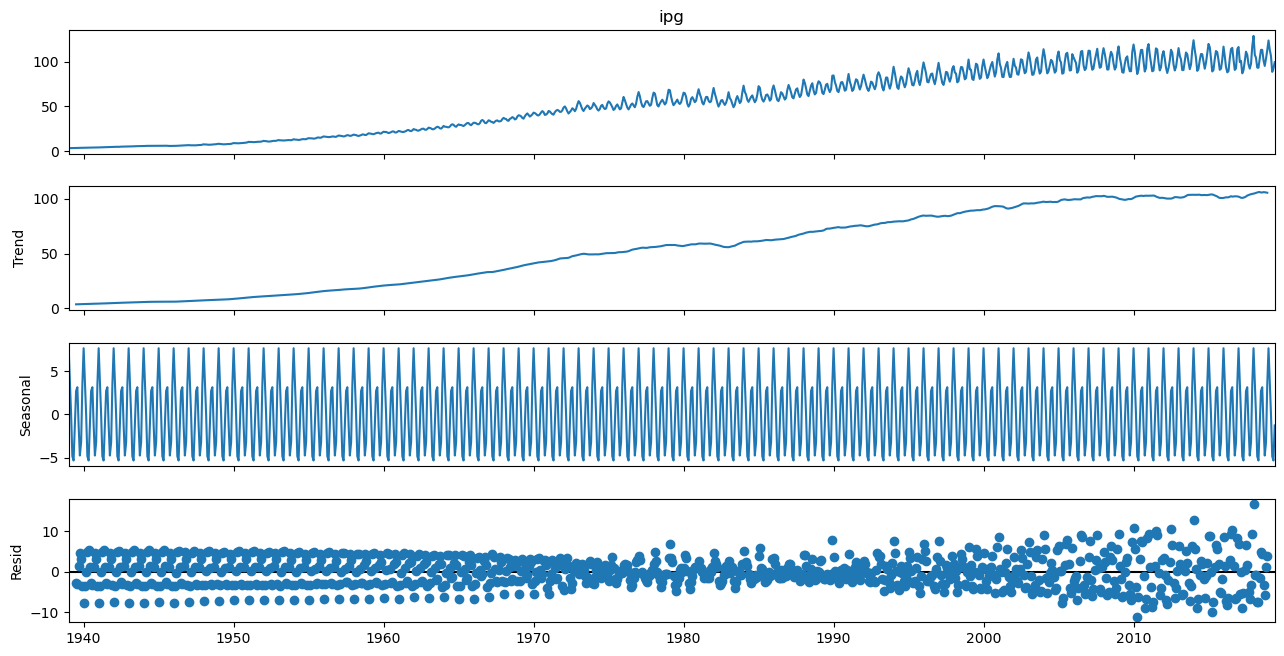

In [29]:
fig = decomposition.plot()
fig.set_size_inches(14,7)
plt.show()

# Aplicar el test ACF para comprobar la estacionaridad de la serie

## Comprobar la estacionariedad

El método que podemos ver a continuación representa los estadísticos (media y varianza) en ventana deslizante para comprobar de forma cómoda si la varianza tiende a cambiar a lo largo del tiempo:

In [54]:
### Representar los estadísticos para comprobar la estacionariedad
def test_stationarity(timeseries, title):
    
    # Determinar los estadísticos
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='media deslizante');
    ax.plot(rolstd, label='desviación típica deslizante (x10)');
    ax.legend()

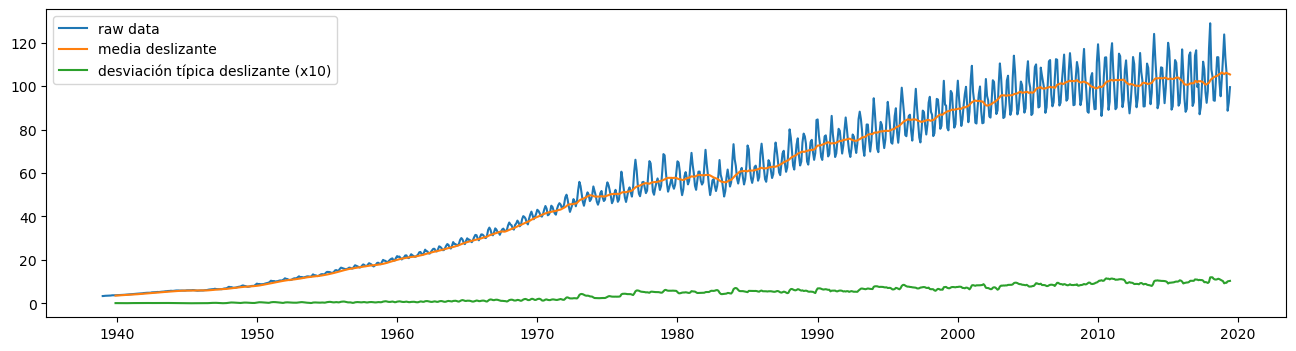

In [55]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(ipg,'raw data')

A simple vista no parece que la desviación típica cambie demasiado, pero sería más correcto realizar este estudio usando algún test estadístico, ya que los cambios pueden no ser evidentes debido a la escala del gráfico.

In [66]:
# ADC test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > ¿Es estacionaria la serie {}?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Estadístico = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Valores críticos :')
    for k, v in dftest[4].items():
        print('\t{}: {} - La serie es {} estacionaria con una confianza de {}%'.format(k, v, 'no' if v<dftest[0] else '', 100-int(k[:-1])))

# ACF test
from statsmodels.tsa.stattools import acf, pacf

def ACF_PACF(timeseries, lags):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseries, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseries, lags=lags, ax=ax2)

In [68]:
ADF_test(ipg,'Datos originales')

 > ¿Es estacionaria la serie Datos originales?
Estadístico = -0.414
P-value = 0.908
Valores críticos :
	1%: -3.437303541847512 - La serie es no estacionaria con una confianza de 99%
	5%: -2.864609814371715 - La serie es no estacionaria con una confianza de 95%
	10%: -2.5684045480287296 - La serie es no estacionaria con una confianza de 90%


Para intentar hacer la serie estacionaria, podemos restar la media deslizante y dividir por la desviación típica deslizante:

 > ¿Es estacionaria la serie datos sin tendencia?
Estadístico = -2.294
P-value = 0.174
Valores críticos :
	1%: -3.437385839245221 - La serie es no estacionaria con una confianza de 99%
	5%: -2.8646461040926496 - La serie es no estacionaria con una confianza de 95%
	10%: -2.5684238776271435 - La serie es no estacionaria con una confianza de 90%


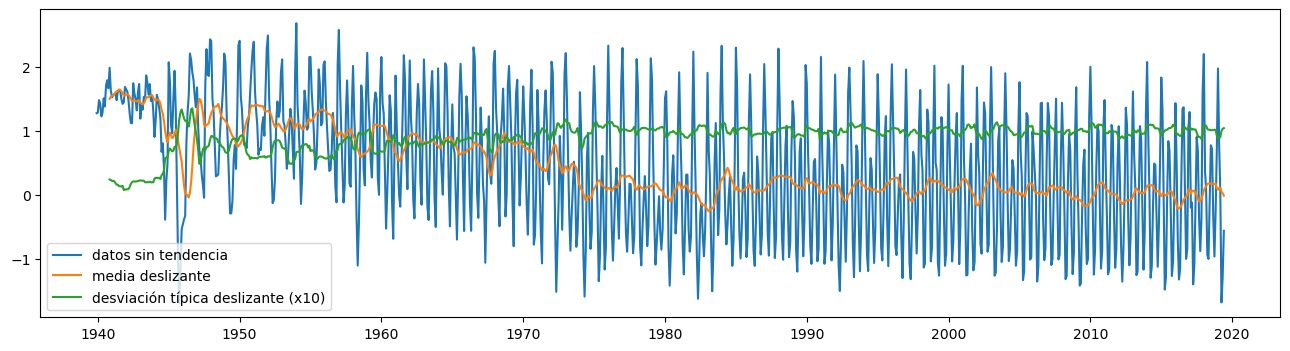

In [69]:
# Eliminar tendencia
ipg_detrend =  (ipg - ipg.rolling(window=12).mean())/ipg.rolling(window=12).std()

test_stationarity(ipg_detrend,'datos sin tendencia')
ADF_test(ipg_detrend,'datos sin tendencia')

Aún así no conseguimos estacionariedad. El problema es que aún tenemos la parte estacional. Una forma de eliminarla es realizar una diferenciación utilizando el periodo correspondiente a la estacionalidad (12 meses en este caso).

 > ¿Es estacionaria la serie datos con retardo de 12 instantes?
Estadístico = -6.461
P-value = 0.000
Valores críticos :
	1%: -3.437393417528114 - La serie es  estacionaria con una confianza de 99%
	5%: -2.864649445749773 - La serie es  estacionaria con una confianza de 95%
	10%: -2.5684256575572735 - La serie es  estacionaria con una confianza de 90%


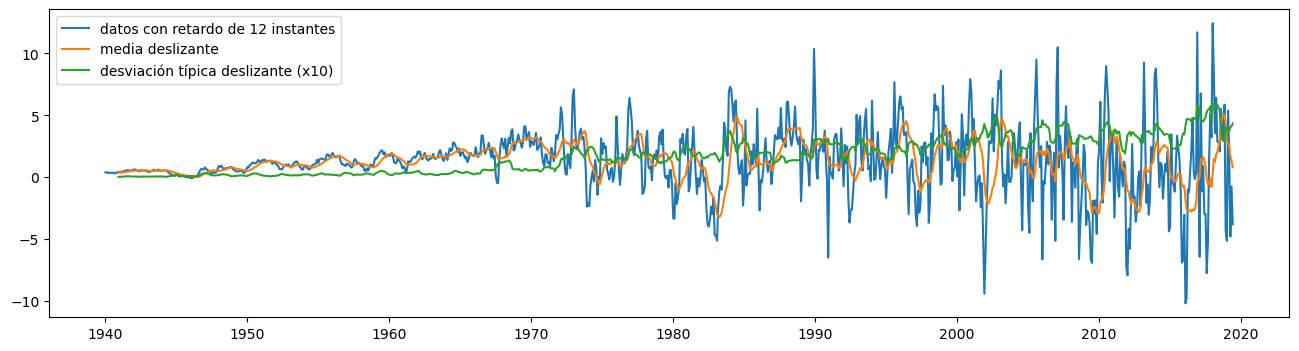

In [70]:
# Differencing
ipg_12lag =  ipg - ipg.shift(12)

test_stationarity(ipg_12lag,'datos con retardo de 12 instantes')
ADF_test(ipg_12lag,'datos con retardo de 12 instantes')

Con esta técnica ya se ha conseguido estacionariedad, por lo que no hay que aplicar más técnicas para conseguirla.

## Autocorrelación

Una ST se dice que es periódica si se repite en intervalos equiespaciados en el tiempo, por ejemplo, cada 12 meses.

La función de autocorrelación (ACF) es una medida de la correlación entre la ST con una versión retardada de la misma. Por ejemplo, si tomamos lag=5, ACF compararía los instantes t6, t7, t8... de la ST con t1, t2, t3...

Existe una función de `pandas` que nos hace una representación de estos valores de autocorrelación:

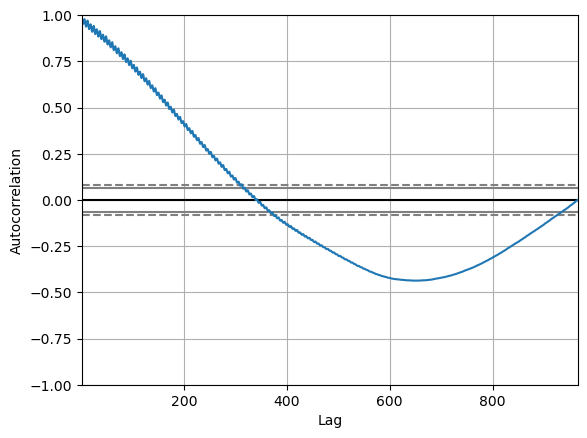

In [60]:
# from pandas.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot

x = df["ipg"].astype(float)
autocorrelation_plot(x);

También podemos calcular los valores de ACF:

Text(0.5, 1.0, 'Autocorrelation Function')

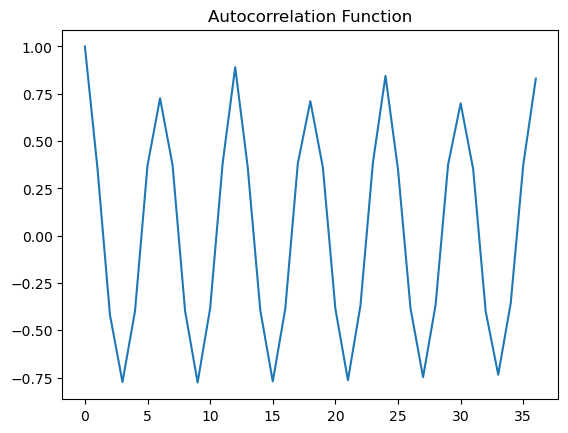

In [61]:
from statsmodels.tsa.stattools import acf

x_diff = x.diff().dropna() # El primer término será NA
lag_acf = acf(x_diff, nlags=36, fft=True)
plt.plot(lag_acf)
plt.title('Autocorrelation Function')

Como se puede observar, el gráfico ACF tiene picos aproximadamente cada 6 meses, lo que quiere decir que la serie está correlada consigo misma de forma semestral (enero con junio, febrero con julio...)

Además los picos con diferencia de 12 meses son muy similarespor lo que además, también está correlada de forma anual. Siendo esta correlación mucho más exacta que la semestral (enero con enero, febrero con febrero...).

## División en conjuntos de entrenamiento y test

Para estar preparado para evaluar el rendimiento de los modelos que se están considerando para su análisis de series temporales, es importante dividir el conjunto de datos en al menos dos partes.

Una parte será el conjunto de datos de 'Entrenamiento', y la otra parte será el conjunto de datos de 'Test'. A veces se crea un tercer conjunto de datos o un conjunto de datos de 'Validación' que reserva algunos datos para pruebas adicionales.

Para los propósitos de este ejemplo de análisis de series de tiempo, solo tendremos entrenamiento y test.

In [42]:
predict_date='2016-01-01'
ipg_to_train = ipg[:predict_date] # Datos de entrenamiento (todos los años salvo los dos últimos)
ipg_to_test = ipg[predict_date:] # Dos últimos años para test
predict_length = len(ipg) - len(ipg[:predict_date]) # Número de datos en test


## Predicción de series temporales utilizando modelos AutoRegressive Moving Average (ARMA)

Inspirado en:

- https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781783553358/7/ch07lvl1sec77/arma-models

- http://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model

- ARIMA: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

Mientras que los modelos de suavización exponencial utilizan medias ponderadas de observaciones pasadas para predecir nuevos valores, los modelos de AR y MA tienen en cuenta las autocorrelaciones o las correlaciones de serie temporal. En otras palabras, los modelos ARMA examinan las diferencias entre los valores de las series temporales.

Los modelos ARMA se suelen utilizar a menudo como herramienta para predecir valores de un ST.
Estos modelos combinan una parte AutoRegresiva (AR) con una parte de medias móviles (Moving Average, MA).
En los modelos MA, asumimos que una variable es la suma de la media de la serie temporal y una combinación lineal de componentes de ruido.

Los modelos AR y MA pueden tener distinto orden. En general, podemos definir un modelo ARMA con $p$ términos autorregresivos y $q$ términos de medias móviles de la siguiente forma:

$$
X_t = \sum_i^p \phi_i X_{t-i} +\sum_i^q \theta_i a_{t-i} + a_t
$$

### Eligiendo $p$ y $q$

Lo primero que deberíamos hacer es representar las funciones de correlación parcial (PACF) para $p$ y las funciones de correlación (ACF) para $q$.

# Gráficos de autocorrelación y autocorrelación parcial

La función de autocorrelación parcial (PACF) mide la correlación entre la ST en una versión retardada de sí misma pero eliminando antes la varianza ya explicada por retardos anteriores. Por ejemplo, si medimos el PACF para un $lag=5$ tendremos en cuenta la correlación con los valores de la serie de hace 5 instantes de tiempo, pero eliminando la varianza ya explicada por los restardos 1, 2, 3 y 4.

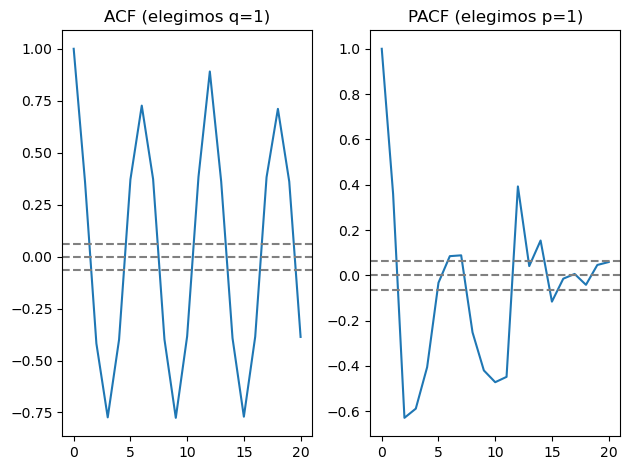

In [48]:
from statsmodels.tsa.stattools import acf, pacf

x = df["ipg"].astype(float)

x_diff = x.diff().dropna() # El primer término será NA

# Valores ACF y PACF:
lag_acf = acf(x_diff, nlags=20, fft=True)
lag_pacf = pacf(x_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('ACF (elegimos q=1)')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('PACF (elegimos p=1)')
plt.tight_layout()

En este gráfico, las dos líneas discontinuas a ambos lados del 0 son intervalos de confianza. Estos intervalos se usan para seleccionar $p$ y $q$ de la siguiente forma:

- $p$: elegir el valor del desfase a partir del cual el PACF cruza el valor superior del intervalo de confianza la primera vez. En este caso $p=1$.

- $q$: elegir el valor del desfase a partir del cual el ACF cruza el valor superior del intervalo de confianza la primera vez. En este caso $q=1$.

# Modelar series

## Modelar un modelo ARMA con statsmodels

1. Definir el modelo llamando a `ARMA()` y dándole los valores de $p$ y de $q$.

2. Entrenar el modelo usando el conjunto de entrenamiento a partir del método `fit()`.

3. Realizar las predicciones llamando a `predict()` el índice de los instantes de tiempo a predecir.

c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\albam\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    ipg   No. Observations:                  966
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2873.056
Date:                Wed, 06 Mar 2024   AIC                           5754.112
Time:                        18:39:10   BIC                           5773.605
Sample:                    01-01-1939   HQIC                          5761.533
                         - 06-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.4891     16.193      3.365      0.001      22.751      86.228
ar.L1          0.9793      0.009    112.813      0.000       0.962       0.996
ma.L1          0.5518      0.018     30.078      0.0

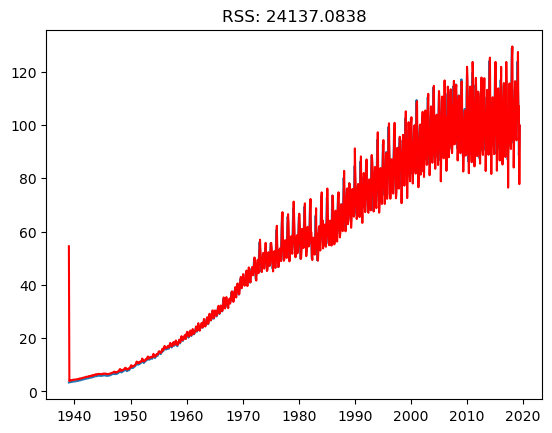

In [49]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo más general Seasonal ARIMA multiplicativo SARIMAX(p,d,q)x(P,D,Q,s)
# order=(p,d,q) seasonal_order(P,D,Q,s)
model = ARIMA(x, order=(1, 0, 1), seasonal_order=(0,0,0,0)).fit() # fit model

print(model.summary())
plt.plot(x)
plt.plot(model.predict(), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-x)**2));

## Modelos SARIMA

Adecuados para datos de series temporales con componentes de tendencia y/o estacionales.

SARIMA se basa en el concepto de ARIMA pero lo amplía para modelar las componentes estacionales de los datos. Observaréis que SARIMA incluye varios parámetros que pueden ajustarse para lograr un rendimiento óptimo. Podéis obtener más información sobre estos parámetros [aquí](https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/). Son los siguientes: 
- Elementos de tendencia:

   - $p$: Orden de autoregresión de tendencia.
   - $d$: Orden de diferencia de tendencia.
   - $q$: Orden de media móvil de tendencia.

- Elementos estacionales:
   - $P$: Orden de autorregresión estacional.
   - $D$: Orden de diferencia estacional.
   - $Q$: Orden de media móvil estacional.

- $s$: Periodo para la parte estacional.

Para obtener la mejor predicción, es importante encontrar los valores de $SARIMA(p,d,q)(P,D,Q)s$ que optimicen una métrica de interés. Para los propósitos de este tutorial, utilizaremos una "búsqueda en cuadrícula" para explorar iterativamente diferentes combinaciones de parámetros.

La métrica de evaluación que utilizaremos para la búsqueda en la cuadrícula es el valor AIC (Criterio de Información de Akaike). El AIC mide lo bien que un modelo se ajusta a los datos teniendo en cuenta la complejidad general del modelo. En general, queremos elegir la combinación con el valor AIC más bajo.

In [50]:
import itertools
import statsmodels.api as sm
import warnings

# Ignoramos los warnings 
warnings.filterwarnings("ignore")

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit(disp=False)
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                print(param)
                print(param_seasonal)
                continue
    print('El conjunto de parámetros con mínimo AIC es: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [51]:
sarima_grid_search(ipg_to_train,12)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:10272.970701877244
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:8968.507338237552
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:4410.815554225364
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:4365.153889007782
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:4264.520889319525
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:4241.012394121135
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:4368.57540411025
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:4182.157855438172
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:9047.642215386644
SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:7824.950619683471
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:3939.940155319855
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:3891.7969741879087
SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:3861.8675367884794
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:3796.1746443837555
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:3897.493651338931
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:3892.054190360541
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:5639.289663756845
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:4871.179352551495
SARIMA(0, 1, 0)x(0, 1, 0,

# Predicción con el modelo SARIMA

Parece que la combinación de parámetros óptima es `SARIMA(1, 1, 1)x(0, 1, 1, 12)` (menor valor de AIC). Así que vamos a usarla para terminar de entrenar el modelo y realizar algunas predicciones.

In [52]:
# Llamar a esta función después de obtener la mejor combinación de parámetros en función del AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # Entrenar el modelo 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # El argumento dynamic=False asegura que realizamos predicciones a un instante de tiempo, 
    # de manera que para cada punto usamos todas las observaciones disponibles hasta ese punto.
    # Con dynamic=Fecha las predicciones de la fase de test se construyen en base a las propias
    # predicciones del modelo (no en base a los valores observados)
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('El RMSE de un modelo SARIMA con season_length={} y dynamic = False es {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observado')
    y_forecasted.plot(ax=ax, label='Predicciones en base a valores observados', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Fecha')
    ax.set_ylabel('Trend')
    plt.legend()
    plt.show()

    # Una mejor idea de la capacidad predictiva puede obtenerse usando predicciones dinámicas.
    # En este caso solo usamos las observaciones hasta un determinado instante temporal y
    # después las predicciones se generan a partir de predicciones pasadas. 
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('El RMSE de un modelo SARIMA con season_length={} y dynamic = True es {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observado')
    y_forecasted_dynamic.plot(label='Predicción dinámica', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Fecha')
    ax.set_ylabel('Trend')

    plt.legend()
    plt.show()
    
    return (results)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5463      0.022     25.003      0.000       0.504       0.589
ma.L1         -0.9409      0.011    -83.343      0.000      -0.963      -0.919
ma.S.L12      -0.6954      0.016    -42.154      0.000      -0.728      -0.663
sigma2         3.1825      0.085     37.523      0.000       3.016       3.349


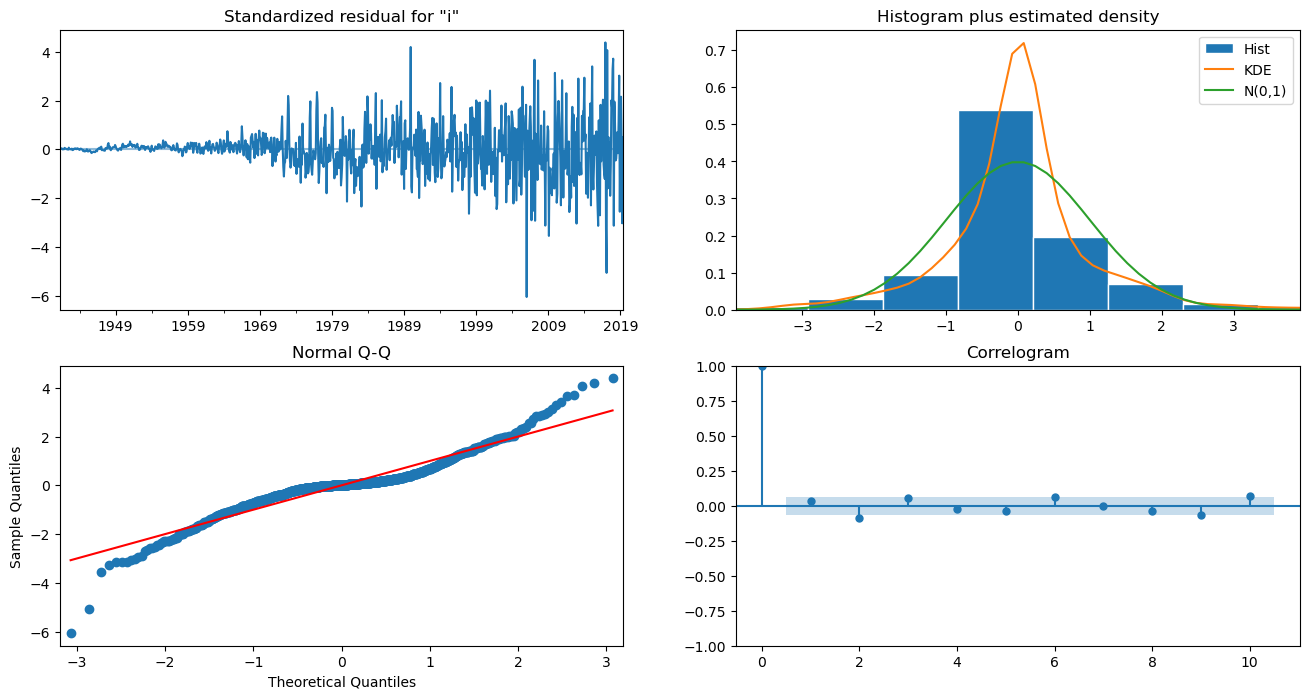

El RMSE de un modelo SARIMA con season_length=52 y dynamic = False es 3.83


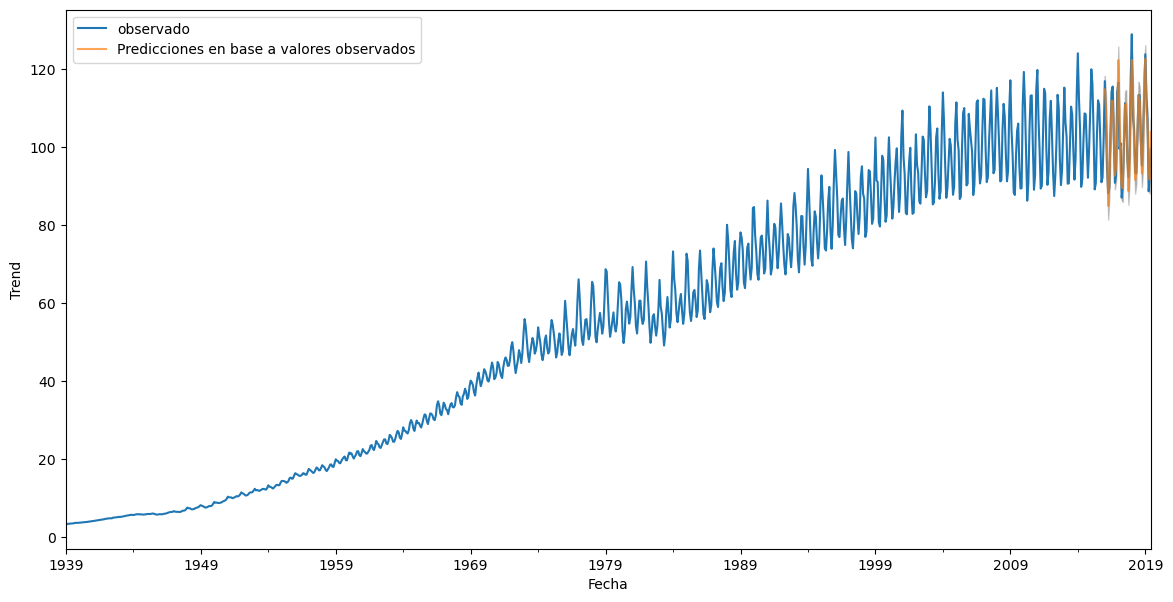

El RMSE de un modelo SARIMA con season_length=52 y dynamic = True es 4.24


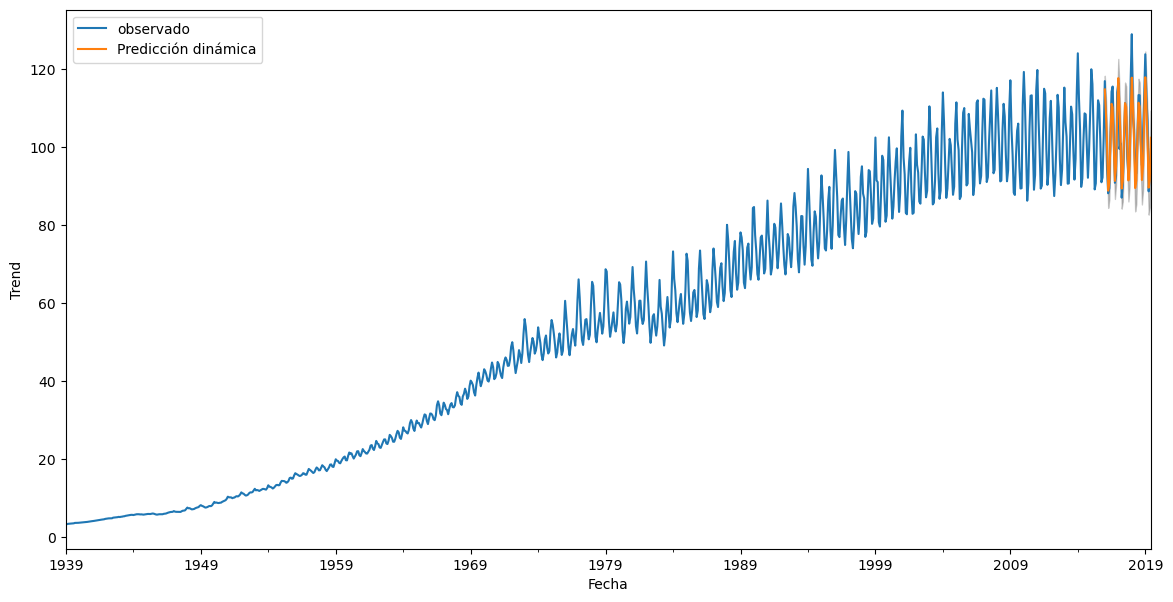

In [53]:
model = sarima_eva(ipg,(1, 1, 1),(0, 1, 1, 12),52,predict_date,ipg_to_test)